In [1]:
import os
os.chdir('../')

In [2]:
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


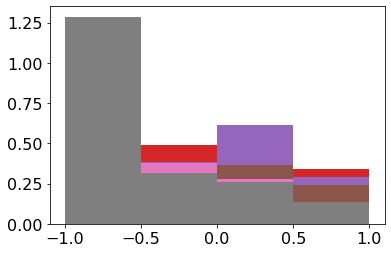

In [3]:
hs = []
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    mpos = rescale_epm_mpos(track['mouse_positionMS'], behav)
    threat = epmthreat(mpos, behav)
    
    #plt.figure(figsize=(15, 5))
    h = plt.hist(threat, bins=np.linspace(-1, 1, 5), density=True)
    h = h[0]
    h /= np.sum(h)
    
    hs.append(h)
hs = np.array(hs)

In [4]:
colors = [[83, 48, 138], [159, 59, 134], [221, 105, 105], [241, 86, 60]]
colors = np.array(colors)/255

In [9]:
from scipy.stats import wilcoxon

In [15]:
print(wilcoxon(hs[:, 0], hs[:, 1]))
print(wilcoxon(hs[:, 2], hs[:, 3]))

WilcoxonResult(statistic=0.0, pvalue=0.0078125)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)


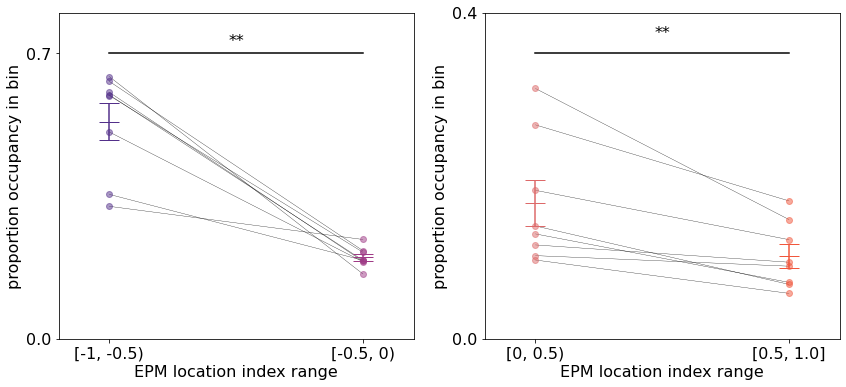

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for i in range(8):
    plt.plot(np.arange(2), hs[i][0:2], c='k', zorder=-1, lw=0.3)
for i in range(2):
    plt.scatter(i*np.ones(8), hs[:, i], color=colors[i], s=36, alpha=0.5)
    plt.errorbar(i, np.mean(hs[:, i]), sem(hs[:, i]), c=colors[i], fmt='_', capsize=10, ms=20)
plt.ylim(0, 0.8)
plt.plot([0, 1], [0.7, 0.7], 'k')
#plt.plot([1, 2], [0.65, 0.65], 'k')
#plt.plot([2, 3], [0.6, 0.6], 'k')
plt.text(0.5, 0.72, '**', ha='center')
plt.yticks([0, 0.7])

plt.xticks(range(2), ['[-1, -0.5)', '[-0.5, 0)'])
plt.xlim(-0.2, 1.2)
plt.ylabel('proportion occupancy in bin')
plt.xlabel('EPM location index range')

plt.subplot(1, 2, 2)
for i in range(8):
    plt.plot(np.arange(2, 4), hs[i][2:4], c='k', zorder=-1, lw=0.3)
for i in range(2, 4):
    plt.scatter(i*np.ones(8), hs[:, i], color=colors[i], s=36, alpha=0.5)
    plt.errorbar(i, np.mean(hs[:, i]), sem(hs[:, i]), c=colors[i], fmt='_', capsize=10, ms=20)
plt.ylim(0, 0.4)
plt.plot([2, 3], [0.35, 0.35], 'k')
#plt.plot([1, 2], [0.65, 0.65], 'k')
#plt.plot([2, 3], [0.6, 0.6], 'k')
plt.text(2.5, 0.37, '**', ha='center')
plt.yticks([0, 0.4])

plt.xticks(range(2, 4), ['[0, 0.5)', '[0.5, 1.0]'])
plt.xlim(1.8, 3.2)
plt.ylabel('proportion occupancy in bin')
plt.xlabel('EPM location index range')

plt.savefig('./elife_figs/2s1B.svg')

In [16]:
mus = np.zeros((len(mousenums), 2))
for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    mpos = rescale_epm_mpos(track['mouse_positionMS'], behav)
    threat = epmthreat(mpos, behav)
    
    #L = calc.shape[0]
    #isO = np.zeros(L, dtype='bool')
    #isO[behav['o']]
    mus[i, 0] = np.mean(calc[(threat < -0.5)])
    mus[i, 1] = np.mean(calc[(threat > 0.5)])
    print(np.mean(calc[(threat < -0.5)]), np.mean(calc[(threat > 0.5)]))

-0.04997165970422561 -0.029600880777287324
-0.03171412916864994 0.17594653199871088
-0.019732836024574738 0.03367409958278959
0.02832697850231163 -0.08744501546325115
0.014488397119428922 -0.11407973206806474
-0.026087872606519822 -0.12736982672360384
-0.04311776504036046 -0.006071728274173816
-0.0391146236138711 0.018128925819993414


In [19]:
ranksums(mus[:, 0], mus[:, 1])

RanksumsResult(statistic=-0.10502100630210073, pvalue=0.9163591402734885)

In [20]:
epm_mpos = np.zeros((0, 2))
epm_avg = np.zeros(0)
nc = 0
for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    mpos = rescale_epm_mpos(track['mouse_positionMS'], behav)
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    nc += calc.shape[1]
    
    epm_mpos = np.vstack((epm_mpos, mpos))
    epm_avg = np.hstack((epm_avg, np.mean(calc, axis = 1)))

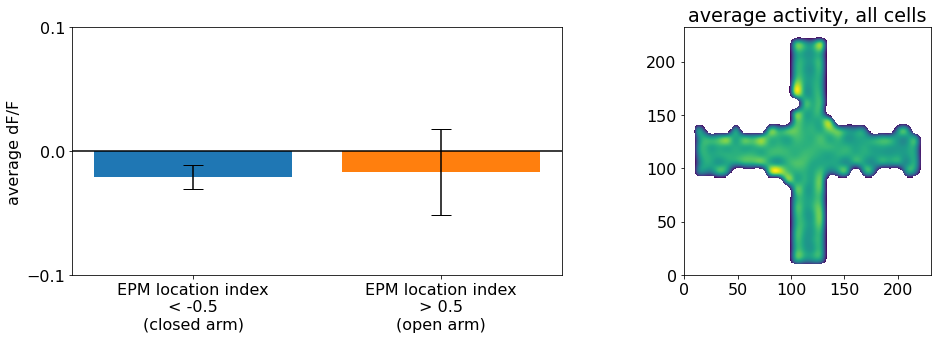

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(0, np.mean(mus[:, 0]))
plt.errorbar(0, np.mean(mus[:, 0]), sem(mus[:, 0]), fmt='k_', ms=0, capsize=10)
plt.bar(1, np.mean(mus[:, 1]))
plt.errorbar(1, np.mean(mus[:, 1]), sem(mus[:, 1]), fmt='k_', ms=0, capsize=10)
plt.xticks([0, 1], ['EPM location index\n< -0.5\n(closed arm)', 'EPM location index\n> 0.5\n(open arm)'])
plt.ylabel('average dF/F')
plt.ylim(-0.1, 0.1)
plt.yticks([-0.1, 0.1, 0])
plt.xlim(plt.xlim())
plt.plot(plt.xlim(), [0]*2, 'k')

plt.subplot(1, 2, 2)
ax = plt.gca()
heatmap, xin, yin = plotheatmap(epm_mpos, epm_avg, step = 0.08, interpstep = 0.01, returnxy = True, ax=ax, 
                               cmap = None)
plt.title('average activity, all cells')


plt.tight_layout()
plt.savefig('./elife_figs/2s1C.svg')

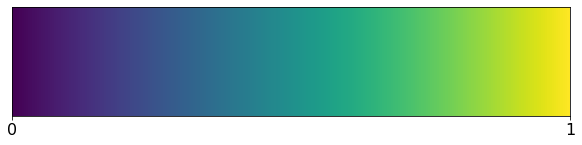

In [16]:
plt.figure(figsize=(10, 2))
plt.imshow(np.arange(0, 256).reshape(1, -1), aspect='auto', extent=[0, 1, 0, 1])
plt.xticks([0, 1])
plt.yticks([])
#plt.savefig('./elife_figs/colormap_2s1B.svg')